# Initial Exploration

## A first look with .head()

In [2]:
import pandas as pd

In [3]:
books = pd.read_csv("../../Datasets/datacamp_dataset/EDA/books.csv")
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [5]:
# A closer look at categorical columns
books.value_counts("genre")

genre
Non Fiction    179
Fiction        131
Childrens       40
dtype: int64

In [6]:
# numerical columns
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

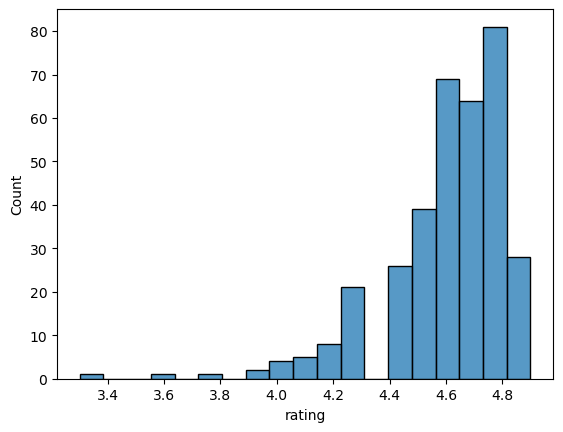

In [8]:
sns.histplot(data=books, x='rating')
plt.show()

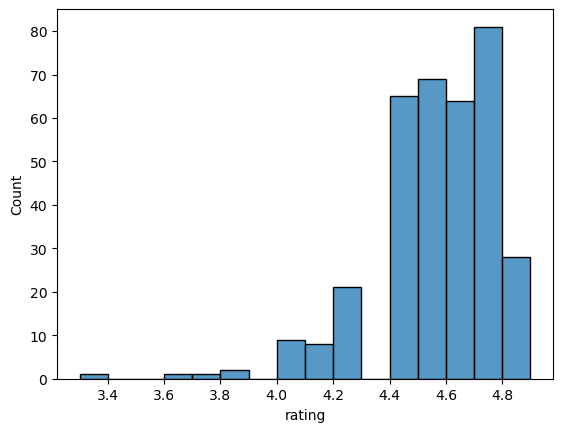

In [9]:
sns.histplot(data=books, x='rating', binwidth=.1)
plt.show()

Data Validation

In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [11]:
# 데이터 유형에만 관심이 있는 경우, dtypes만을 출력할 수 있다.
# 연도의 경우, 항상 정수여야 하는데 float로 되어있느면 맞지 않다.
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [12]:
# Updating data types
books['year'] = books['year'].astype(int)

In [13]:

books.dtypes

name       object
author     object
rating    float64
year        int32
genre      object
dtype: object

In [14]:
# Validating categorical data
books['genre'].isin(['Fiction', 'Non Fiction'])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [15]:
# 이렇게하면 True False값을 뒤집을 수 있다.
~books['genre'].isin(['Fiction', 'Non Fiction'])

0      False
1      False
2      False
3      False
4       True
       ...  
345    False
346    False
347    False
348    False
349     True
Name: genre, Length: 350, dtype: bool

In [17]:
# Validation with Filtering
books[~books['genre'].isin(['Fiction', 'Non Fiction'])].head()

,name,author,rating,year,genre
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens
26,Baby Touch and Feel: Animals,DK,4.6,2015,Childrens
36,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,2017,Childrens
37,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,2011,Childrens
53,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,2015,Childrens


In [18]:
books.year.min()

2009

In [19]:
books.year.max()

2019

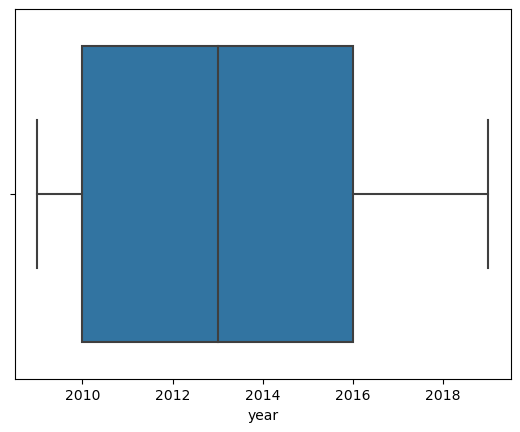

In [20]:
sns.boxplot(data=books, x='year')
plt.show()

### boxplot 해석
4분위수로 표현되는 박스플롯은
25번째 및 75번째 백분위수에 해당하는 값을 박스로 표시해주고(2010년, 2016년)  
min 값과 max값을 양 끝쪽의 일자 선으로 표시해준다.  

<Axes: xlabel='year', ylabel='genre'>

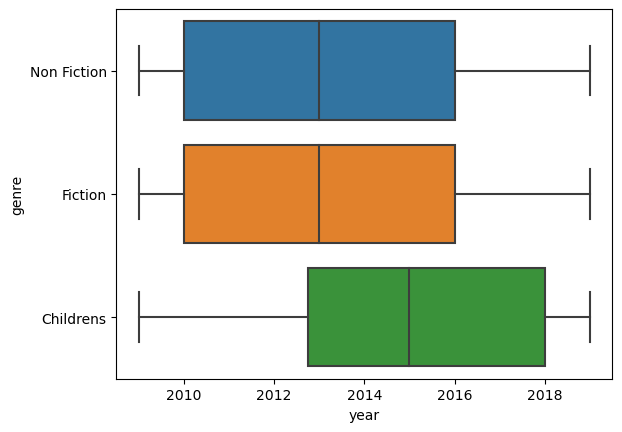

In [21]:
# y키워드를 넣어서 범주별로 나누어 볼 수 있다.
sns.boxplot(data=books, x='year', y='genre')

In [22]:
books.groupby('genre').mean()

C:\Users\jhuyk\AppData\Local\Temp\ipykernel_15840\4083910807.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  books.groupby('genre').mean()


,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


In [23]:
books.agg(['mean', 'std'])

C:\Users\jhuyk\AppData\Local\Temp\ipykernel_15840\251984296.py:1: FutureWarning: ['name', 'author', 'genre'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  books.agg(['mean', 'std'])


,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


## Specifiying aggregation for columns


In [24]:
books.agg({'rating': ['mean', 'std'], 'year': ['median']})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [25]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int32  
 4   genre   350 non-null    object 
dtypes: float64(1), int32(1), object(3)
memory usage: 12.4+ KB


In [28]:
## groupby와 활용하면 아래와 같은 코드도 가능하다.
books.groupby('genre').agg(
    mean_rating=('rating', 'mean'),
    std_rating=('rating', 'std'),
    median_year=('year', 'median')
)

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


## Visualizting categorical summaries
#### sns.barplot은 양적 변수의 `평균`을 자동으로 계산.

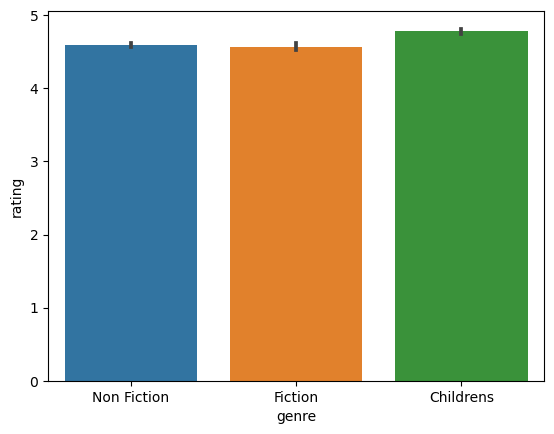

In [30]:
sns.barplot(data=books, x='genre', y='rating')
plt.show()

In [33]:
books.groupby('genre').agg({'rating':['mean']})

,rating
,mean
genre,
Childrens,4.780000
Fiction,4.570229
Non Fiction,4.598324


In [34]:
books.groupby('genre').rating.mean()

genre
Childrens      4.780000
Fiction        4.570229
Non Fiction    4.598324
Name: rating, dtype: float64